In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
def clean_job_skills(val):
    if pd.notna(val):
        return ast.literal_eval(val)

df['job_skills'] = df['job_skills'].apply(clean_job_skills)

In [5]:
job = 'Data Analyst'
country = 'United States'
top = 10

In [6]:
df_filtered = df[(df['job_country'] == country) & (df['job_title_short'] == job)].copy()
df_filtered.dropna(subset=['salary_year_avg'], inplace= True)

In [7]:
df_exploded = df_filtered.explode('job_skills').copy()

In [8]:
df_skills = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_skills.rename(columns= {'count' : 'skill_count', 'median' : 'median_sal'}, inplace= True)

In [9]:
df_skills

,skill_count,median_sal
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [10]:
df_job_count = len(df_filtered)
df_skills['skill_percent'] = df_skills['skill_count'] / df_job_count * 100
df_skills
# df_job_count

,skill_count,median_sal,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [11]:
skill_percent = 5
df_skills_filtered = df_skills[df_skills['skill_percent'] > skill_percent]
df_skills_filtered.index

Index(['sql', 'excel', 'python', 'tableau', 'sas', 'r', 'power bi',
       'powerpoint', 'word', 'sql server', 'oracle', 'go'],
      dtype='object', name='job_skills')

In [12]:
from adjustText import adjust_text

In [13]:
sns.set_theme(style= 'ticks')

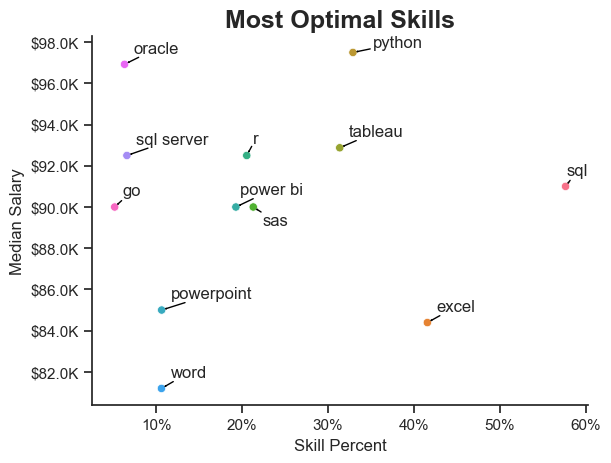

In [14]:
sns.scatterplot(
    data= df_skills_filtered,
    x = 'skill_percent',
    y = 'median_sal',
    hue= 'job_skills',
    legend= False
)
plt.xlabel("Skill Percent")
plt.ylabel("Median Salary")
plt.title("Most Optimal Skills", fontsize = 18, fontweight= 'bold')
sns.despine()
texts = []
for i in range(len(df_skills_filtered)):
    texts.append(plt.text(df_skills_filtered['skill_percent'].iloc[i], df_skills_filtered['median_sal'].iloc[i], df_skills_filtered.index[i]))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))

from matplotlib.ticker import PercentFormatter 
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(texts= texts, expand=(1.8, 2), arrowprops=dict(arrowstyle='->', color='black'))
plt.show()

In [15]:
df_filtered['job_type_skills'][109]

"{'analyst_tools': ['alteryx', 'tableau'], 'programming': ['python', 'r']}"

In [16]:
df_fil = df_filtered['job_type_skills'].copy()
df_fil = df_fil.drop_duplicates()
df_fil = df_fil.dropna()
df_fil

109       {'analyst_tools': ['alteryx', 'tableau'], 'pro...
180              {'analyst_tools': ['excel', 'powerpoint']}
410       {'analyst_tools': ['word', 'excel', 'visio', '...
988       {'analyst_tools': ['excel', 'tableau'], 'progr...
1413      {'analyst_tools': ['excel', 'power bi'], 'prog...
                                ...                        
777579    {'analyst_tools': ['tableau', 'power bi', 'loo...
777764    {'analyst_tools': ['excel'], 'async': ['jira']...
781263    {'cloud': ['databricks'], 'libraries': ['spark...
781697    {'libraries': ['scikit-learn', 'spark', 'mxnet...
782637    {'databases': ['sql server'], 'programming': [...
Name: job_type_skills, Length: 2088, dtype: object

In [17]:
dic = {}
for row in df_fil:
    row_dict = ast.literal_eval(row)
    for key, val in row_dict.items():
        if key in dic:
            dic[key] += val
        else:
            dic[key] = val
for k, v in dic.items():
    dic[key] = list(set(val))

dic

{'analyst_tools': ['alteryx',
  'tableau',
  'excel',
  'powerpoint',
  'word',
  'excel',
  'visio',
  'powerpoint',
  'sharepoint',
  'excel',
  'tableau',
  'excel',
  'power bi',
  'excel',
  'tableau',
  'power bi',
  'excel',
  'visio',
  'outlook',
  'word',
  'excel',
  'powerpoint',
  'sharepoint',
  'tableau',
  'excel',
  'ssrs',
  'ssis',
  'excel',
  'tableau',
  'word',
  'excel',
  'outlook',
  'ssrs',
  'ssis',
  'power bi',
  'sas',
  'tableau',
  'power bi',
  'excel',
  'word',
  'tableau',
  'power bi',
  'tableau',
  'power bi',
  'tableau',
  'excel',
  'tableau',
  'sas',
  'tableau',
  'power bi',
  'looker',
  'tableau',
  'power bi',
  'sap',
  'powerpoint',
  'power bi',
  'excel',
  'word',
  'excel',
  'tableau',
  'power bi',
  'looker',
  'excel',
  'power bi',
  'sas',
  'excel',
  'tableau',
  'looker',
  'excel',
  'powerpoint',
  'sas',
  'qlik',
  'tableau',
  'alteryx',
  'excel',
  'word',
  'powerpoint',
  'excel',
  'power bi',
  'ssrs',
  'ssis'

In [18]:
df_fil = pd.DataFrame(list(dic.items()), columns=['technology', 'skill'])
df_fil

,technology,skill
0,analyst_tools,"[alteryx, tableau, excel, powerpoint, word, ex..."
1,programming,"[vba, sql]"
2,cloud,"[azure, databricks, oracle, snowflake, aws, az..."
3,os,"[linux, linux, linux, unix, windows, windows, ..."
4,webframeworks,"[express, express, express, flask, express, an..."
5,other,"[flow, flow, flow, terminal, git, flow, termin..."
6,databases,"[sql server, sql server, sql server, sql serve..."
7,libraries,"[hadoop, pandas, numpy, scikit-learn, hadoop, ..."
8,async,"[jira, asana, planner, jira, confluence, smart..."
9,sync,"[zoom, slack, slack, zoom, microsoft teams, sy..."


In [19]:
df_fil = df_fil.explode('skill')

In [20]:
df_fil

,technology,skill
0,analyst_tools,alteryx
0,analyst_tools,tableau
0,analyst_tools,excel
0,analyst_tools,powerpoint
0,analyst_tools,word
...,...,...
9,sync,slack
9,sync,zoom
9,sync,microsoft teams
9,sync,microsoft teams


In [21]:
df_skills_filtered.merge(df_fil, left_on='job_skills', right_on= 'skill')

,skill_count,median_sal,skill_percent,technology,skill
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1808,84392.00,41.563218,analyst_tools,excel
3,1808,84392.00,41.563218,analyst_tools,excel
4,1808,84392.00,41.563218,analyst_tools,excel
...,...,...,...,...,...
3817,274,96923.75,6.298851,cloud,oracle
3818,274,96923.75,6.298851,cloud,oracle
3819,274,96923.75,6.298851,cloud,oracle
3820,274,96923.75,6.298851,cloud,oracle


In [ ]:
df_skills_filtered = df_skills_filtered.drop_duplicates()
df_skills_filtered

,skill_count,median_sal,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [ ]:
df_skills_filtered

,skill_count,median_sal,skill_percent,technology,skill
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
1001,1364,92875.00,31.356322,analyst_tools,tableau
1894,926,90000.00,21.287356,analyst_tools,sas
2212,838,90000.00,19.264368,analyst_tools,power bi
2754,462,85000.00,10.620690,analyst_tools,powerpoint
3082,461,81194.75,10.597701,analyst_tools,word
3405,286,92500.00,6.574713,databases,sql server
3615,274,96923.75,6.298851,cloud,oracle


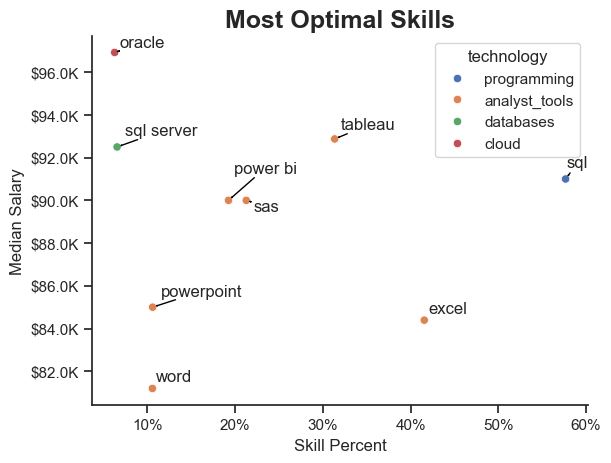

<Figure size 1920x1080 with 0 Axes>

In [ ]:
sns.scatterplot(
    data= df_skills_filtered,
    x = 'skill_percent',
    y = 'median_sal',
    hue= 'technology'
)
plt.xlabel("Skill Percent")
plt.ylabel("Median Salary")
plt.title("Most Optimal Skills", fontsize = 18, fontweight= 'bold')
sns.despine()
plt.legend(title='technology', loc='upper right')

texts = []
for i in range(len(df_skills_filtered)):
    texts.append(plt.text(df_skills_filtered['skill_percent'].iloc[i], df_skills_filtered['median_sal'].iloc[i], df_skills_filtered['skill'].iloc[i]))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))

ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(texts= texts, expand=(1.2, 2), arrowprops=dict(arrowstyle='->', color='black'))
plt.figure(figsize=(19.2, 10.8))
plt.show()
